In [77]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import re
import glob

# Define the pattern to extract timestamp, user, and message
pattern = r'\[(.*?)\] (.*?): (.*)'

# Specify the directory containing the text files
directory = ""

# Get a list of all .txt files in the directory
txt_files = glob.glob(directory + "*.txt")

# Create an empty list to store DataFrames
dfs = []

# Iterate over each txt file
for file_path in txt_files:
    try:
        # Read the file and extract data using regular expressions
        data = []
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                match = re.match(pattern, line)
                if match:
                    timestamp, user, message = match.groups()
                    data.append([timestamp, user, message])
        
        # Create a DataFrame from the extracted data
        dft = pd.DataFrame(data, columns=["Timestamp", "User", "Message"])
        
        # Append the DataFrame to the list
        dfs.append(dft)
    except Exception as e:
        print(f"Error processing file {file_path}: {str(e)}")



In [78]:
len(dfs)

12

In [79]:
#all
#df = pd.concat(dfs, ignore_index=True)

#only the last
n = len(dfs) - 1
df = dfs[n]

In [80]:
# Specify the file path
#file_path = "[5-7-24]Text.txt"
#file_path = "[5-9-24].txt"
#file_path = "[5-11-24].txt"
#file_path = "[5-13-24].txt"

# Define the pattern to extract timestamp, user, and message
#pattern = r'\[(.*?)\] (.*?): (.*)'

# Read the file and extract data using regular expressions
#data = []
#with open(file_path, 'r', encoding='utf-8') as file:
#    for line in file:
#        match = re.match(pattern, line)
#        if match:
#            timestamp, user, message = match.groups()
#            data.append([timestamp, user, message])

# Create a DataFrame from the extracted data
#df = pd.DataFrame(data, columns=["Timestamp", "User", "Message"])

In [95]:
df.head(10)

,Timestamp,User,Message,Message_long
0,2024-05-09 14:56:43+00:00,Martin_Gales,yo,2
1,2024-05-09 14:56:56+00:00,Martin_Gales,cool shirt,10
2,2024-05-09 14:57:28+00:00,Martin_Gales,OMEGALUL,8
3,2024-05-09 14:57:33+00:00,Martin_Gales,not the hobbits?,16
4,2024-05-09 14:57:47+00:00,StreamElements,dorozea is now live! Streaming Just Chatting: ...,75
5,2024-05-09 14:58:06+00:00,FarfarFertil,yo,2
6,2024-05-09 14:58:24+00:00,mahlonsmithiv,hola doro,9
7,2024-05-09 14:58:34+00:00,Banties1g,Yooo,4
8,2024-05-09 14:58:37+00:00,Banties1g,omg omg,7
9,2024-05-09 14:58:37+00:00,Banties1g,omg omg 󠀀,9


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Timestamp     2340 non-null   datetime64[ns, UTC]
 1   User          2340 non-null   object             
 2   Message       2340 non-null   object             
 3   Message_long  2340 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 73.3+ KB


In [97]:
df.describe()

,Message_long
count,2340.000000
mean,28.295726
std,32.277941
min,1.000000
25%,9.000000
50%,19.000000
75%,35.000000
max,475.000000


In [98]:
df['Message_long'] = df['Message'].apply(lambda x: len(x))

df.tail(10)

,Timestamp,User,Message,Message_long
2330,2024-05-09 19:52:16+00:00,dorozea,MinionPls,9
2331,2024-05-09 19:52:16+00:00,dorozea,MinionPls,9
2332,2024-05-09 19:52:19+00:00,iFz4G,bye bye,7
2333,2024-05-09 19:52:19+00:00,akitox1c,bye,3
2334,2024-05-09 19:52:30+00:00,slarzka,bye,3
2335,2024-05-09 19:52:34+00:00,Martin_Gales,Piss raid MinionPls Piss raid MinionPls Piss r...,199
2336,2024-05-09 19:52:39+00:00,slarzka,apex tomoroe?,13
2337,2024-05-09 19:52:45+00:00,akitox1c,"oh thats great , but bye",24
2338,2024-05-09 19:52:50+00:00,lezgizzyss,bye @e,6
2339,2024-05-09 19:52:56+00:00,Lasbe,bye,3


In [99]:
# Find the index of the row with the longest message
max_length_index = df['Message_long'].idxmax()

# Retrieve the message with the longest length
longest_message = df.loc[max_length_index, 'Message']
longest_user = df.loc[max_length_index, 'User']
longest_time = df.loc[max_length_index, 'Timestamp']

# Print the longest message
print("The longest message is:\n", longest_message, "\nfrom\n",longest_user,'\n at ',longest_time)

The longest message is:
 ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ]  ] ] ] ] 
from
 klimzaa 
 at  2024-05-09 15:31:27+00:00


In [100]:
df[df['User']=='balintboss'].describe()

,Message_long
count,22.000000
mean,22.227273
std,22.170190
min,3.000000
25%,5.000000
50%,14.500000
75%,26.250000
max,78.000000


In [102]:
# Count the occurrences of each user
user_counts = df['User'].value_counts()
user_counts.head(10)

User
Martin_Gales      254
Banties1g         137
ylb_cat_soul22    117
Risc__V           112
1SKELTON           96
IvanOnMyOwn        93
akitox1c           87
StreamElements     83
roxa0              81
oJov               69
Name: count, dtype: int64

In [103]:
len(user_counts)

205

In [104]:
user_counts.describe()

count    205.000000
mean      11.414634
std       27.386822
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max      254.000000
Name: count, dtype: float64

In [105]:
user_pos = user_counts[user_counts.index == 'balintboss']

user_pos

User
balintboss    22
Name: count, dtype: int64

In [106]:
df[df['User']=='balintboss']['Message_long'].mean()

22.227272727272727

In [107]:
df['Message_long'].mean()

28.295726495726495

In [108]:


# Filter the DataFrame to include only messages sent by 'balintboss'
balintboss_messages = df[df['User'] == 'balintboss']

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [109]:
balintboss_messages_10min = balintboss_messages.resample('10min', on='Timestamp').count()

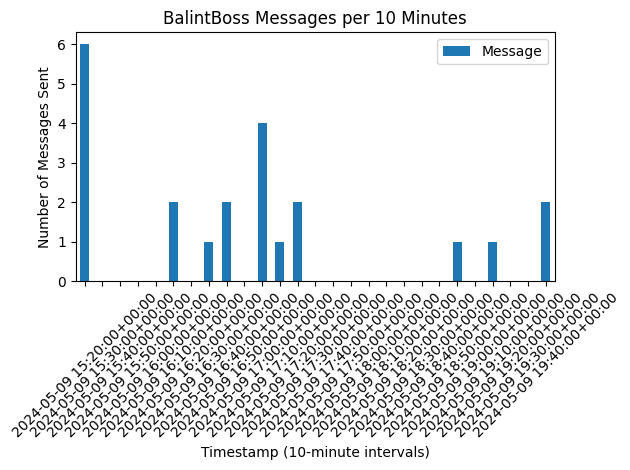

In [110]:
# Check if 'Timestamp' exists as a column
if 'Timestamp' in balintboss_messages_10min.columns:
  # Set 'Timestamp' as the index
  print('doing it')
  balintboss_messages_10min = balintboss_messages_10min.set_index('Timestamp')

# Plot the chart (assuming 'Timestamp' is now the index)
balintboss_messages_10min.plot(kind='bar', y='Message', title='BalintBoss Messages per 10 Minutes')

# Customize the chart as needed (same as before)
plt.xlabel('Timestamp (10-minute intervals)')
plt.ylabel('Number of Messages Sent')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show() 

In [111]:
balintboss_messages_10min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2024-05-09 15:20:00+00:00 to 2024-05-09 19:40:00+00:00
Freq: 10min
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User          27 non-null     int64
 1   Message       27 non-null     int64
 2   Message_long  27 non-null     int64
dtypes: int64(3)
memory usage: 864.0 bytes


In [112]:
df.to_csv('TestDoroChat.csv', index=False)